# 1 KNN classification demo

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [3]:
# separate target (dependent variables) and features (independent variables)
y = df['species']
X = df[['petal_length', 'petal_width']]

In [4]:
# dispatch data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
# use KNN class with n neighbors as  a  hyper-parameter
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [6]:
# y_test is the real label of the data set
# y_pred is the predicted label by KNN.
pd.DataFrame({'y_predict': y_pred, 'y_test': y_test})

,y_predict,y_test
22,setosa,setosa
18,setosa,setosa
11,setosa,setosa
128,virginica,virginica
51,versicolor,versicolor
24,setosa,setosa
133,versicolor,virginica
33,setosa,setosa
35,setosa,setosa
144,virginica,virginica


In [10]:
# list the matches between the two sets
(results['y_predict'] == results['y_test']).mean() 

NameError: name 'results' is not defined

## 2 Implement k-Means clustering - Unsupervised model

In [6]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

### Preparation: Generate data to use for testing k-means clustering

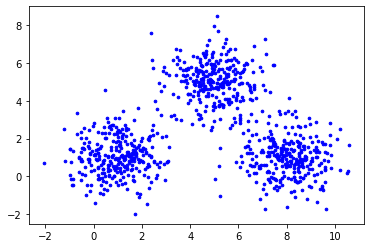

In [7]:
# generate random data 
gt_1 = np.array([1,1])
gt_2 = np.array([5,5])
gt_3 = np.array([8,1])

data_1 = np.random.randn(300,2) + gt_1
data_2 = np.random.randn(300,2) + gt_2
data_3 = np.random.randn(300,2) + gt_3
data = np.concatenate((data_1, data_2, data_3),axis = 0)
plt.scatter(data[:,0], data[:,1], s=7,c='b')

In [8]:
# Compare to sklearn.cluster.means
from sklearn.cluster import KMeans

In [9]:
# initialize the KMeans and fit it with data
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
print('--------------------- KMeans result --------------------')
print(kmeans.inertia_)
print(kmeans.cluster_centers_)

--------------------- KMeans result --------------------
1797.1686758547567
[[8.05166712 0.96318597]
 [4.9761169  5.02185636]
 [0.96143279 1.04563063]]


In [10]:
kmeans.cluster_centers_[:,0]

array([8.05166712, 4.9761169 , 0.96143279])

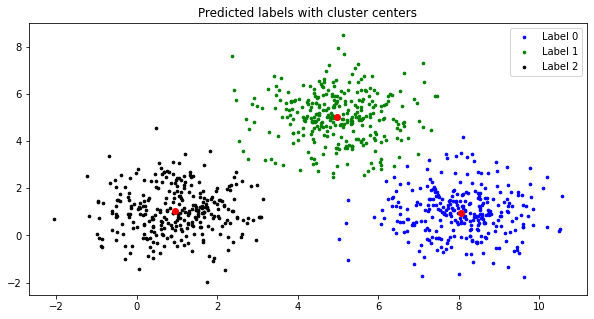

In [11]:
data_df = pd.DataFrame(data, columns=['x','y'])
data_df['label'] = kmeans.labels_
c = ['b', 'g', 'k']
plt.figure(figsize=(10,5))

for i in range(3):
    data_temp = data_df[data_df['label'] == i]
    plt.scatter(data_temp['x'], data_temp['y'], s=7, c=c[i], label = f'Label {i}')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')
plt.legend()
plt.title('Predicted labels with cluster centers')
plt.show()

## Choose the best number of clusters



In [12]:
# Plot the WCSS according to the number of clusters
# WCSS (inertia in KMeans) = sum of distance to centers
# WCSS stands for Within Cluster Sum of Squares
# WCSS= ∑Pi in Cluster1 distance(Pi C1)2 +∑Pi in Cluster2distance(Pi C2)2+∑Pi in CLuster3 distance(Pi C3)2

In [13]:
for k in range(3,40,3):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    print(f'--------------------- KMeans result {k} clusters --------------------')
    print(kmeans.inertia_)

--------------------- KMeans result 3 clusters --------------------
1797.1686758547567
--------------------- KMeans result 6 clusters --------------------
1180.7147580222102
--------------------- KMeans result 9 clusters --------------------
809.7224603878523
--------------------- KMeans result 12 clusters --------------------
638.5536290838131
--------------------- KMeans result 15 clusters --------------------
523.6852927233405
--------------------- KMeans result 18 clusters --------------------
433.40544495136396
--------------------- KMeans result 21 clusters --------------------
365.2448255102439
--------------------- KMeans result 24 clusters --------------------
327.07425489273703
--------------------- KMeans result 27 clusters --------------------
284.80156324248844
--------------------- KMeans result 30 clusters --------------------
256.6832301495562
--------------------- KMeans result 33 clusters --------------------
234.4480717141954
--------------------- KMeans result 36 cl

No handles with labels found to put in legend.


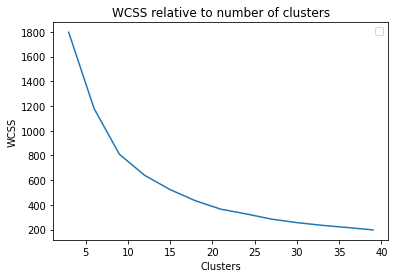

In [15]:
# x=number of clusters
# y=WCSS
x = [x for x in range(3,40,3)]
y = [KMeans(n_clusters=k, random_state=0).fit(data).inertia_ for k in x]
plt.plot(x,y)
plt.title('WCSS relative to number of clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

In [1]:
# Now let's compute the WSSC

In [3]:
# First create a function that compute the distance between two points
# See the formula below

Euclidian distance between two points

$ X_1: (x_1, y_1), X_2: (x_2, y_2) $ 

$ distance = \sqrt((x_2 - x_1)^2 + (y_2 - y_1)^2) $


In [16]:
import math
def distance_2_points(x,y):
    # return math.sqrt((y[0] - x[0]) ** 2 + (y[1] - x[1]) ** 2) # formula does not work with array
    return pow(pow((y - x),2).sum(),1/2)

In [17]:
p1 = np.array([[2,2]])
p2 = np.array([[1,1]])
print(distance_2_points(p1,p2))

1.4142135623730951


In [12]:
# Now compute the distance between the point (5,5) and all data points
# Hint: Use broadcasting of arrays in numpy and np.sum.

In [18]:
print(f"Before: \n {data[:5]} \n \n After broadcasting [[5,5]]: \n \n {data - [[5,5]]}")

Before: 
 [[ 1.74671297  1.16921931]
 [ 1.6219161   0.0413161 ]
 [ 0.67421318  2.67366377]
 [ 0.90632406  2.59472278]
 [-0.35428179  0.05139024]] 
 
 After broadcasting [[5,5]]: 
 
 [[-3.25328703 -3.83078069]
 [-3.3780839  -4.9586839 ]
 [-4.32578682 -2.32633623]
 ...
 [ 3.761137   -4.00098792]
 [ 2.60090122 -3.80021487]
 [ 1.44364132 -3.76927507]]


In [19]:
def wcss_0(data, center = [[5,5]]):
    return pow(pow((data - center),2).sum(),1/2)

In [20]:
wcss_0(data)

137.79456165446405

In [21]:
data.shape

(900, 2)

In [26]:
print(kmeans.inertia_)

197.5677279734374


In [27]:
label = kmeans.labels_
label.shape

(900,)

In [30]:
# Now compute the wcss given by the model above.
def wcss(data, label, centers):
    return sum([pow((data[label == k] - centers[k]),2).sum() for k in range(3)])

In [31]:
centers = kmeans.cluster_centers_
# Those are the labels of each data point according to the KNN model
label = kmeans.labels_

wcss(data, label, centers)

16.169961949259537